In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import warnings
import glob
from IPython.core.display import HTML

%matplotlib inline
warnings.filterwarnings('ignore')

In [27]:
path = 'csse_covid_19_data/csse_covid_19_daily_reports/*.csv'
df= pd.DataFrame()
for fname in glob.glob(path):
    df = df.append(pd.read_csv(fname))

In [28]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126866 entries, 0 to 3419
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Province/State  4358 non-null    object 
 1   Country/Region  7617 non-null    object 
 2   Last Update     7617 non-null    object 
 3   Confirmed       126847 non-null  float64
 4   Deaths          126425 non-null  float64
 5   Recovered       126478 non-null  float64
 6   Latitude        4799 non-null    float64
 7   Longitude       4799 non-null    float64
 8   FIPS            108442 non-null  float64
 9   Admin2          108928 non-null  object 
 10  Province_State  112326 non-null  object 
 11  Country_Region  119249 non-null  object 
 12  Last_Update     119249 non-null  object 
 13  Lat             117556 non-null  float64
 14  Long_           117556 non-null  float64
 15  Active          119249 non-null  float64
 16  Combined_Key    119249 non-null  object 
dtypes: float64(9

In [ ]:
df.Last_Update = np.where()

In [37]:
df.Last_Update = np.where(df['Last_Update'].isna(),df['Last Update'], df.Last_Update)
df.Last_Update = pd.to_datetime(df.Last_Update)
df = df.sort_values(by = 'Last_Update')
df.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Active,Combined_Key
33,Yunnan,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-22 17:00:00,NaN,NaN,NaN,NaN
31,Washington,US,1/22/2020 17:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-22 17:00:00,NaN,NaN,NaN,NaN
30,Tibet,Mainland China,1/22/2020 17:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-22 17:00:00,NaN,NaN,NaN,NaN
14,Hunan,Mainland China,1/22/2020 17:00,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-22 17:00:00,NaN,NaN,NaN,NaN
28,Taiwan,Taiwan,1/22/2020 17:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-22 17:00:00,NaN,NaN,NaN,NaN


In [38]:
df = df[df.Confirmed.notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126847 entries, 33 to 2109
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Province/State  4345 non-null    object        
 1   Country/Region  7598 non-null    object        
 2   Last Update     7598 non-null    object        
 3   Confirmed       126847 non-null  float64       
 4   Deaths          126425 non-null  float64       
 5   Recovered       126478 non-null  float64       
 6   Latitude        4799 non-null    float64       
 7   Longitude       4799 non-null    float64       
 8   FIPS            108442 non-null  float64       
 9   Admin2          108928 non-null  object        
 10  Province_State  112326 non-null  object        
 11  Country_Region  119249 non-null  object        
 12  Last_Update     126847 non-null  datetime64[ns]
 13  Lat             117556 non-null  float64       
 14  Long_           117556 non-null  floa

In [64]:
df_confirmed.to_timestamp()

AttributeError: 'RangeIndex' object has no attribute 'to_timestamp'

In [65]:
df_confirmed = pd.DataFrame(df['Confirmed'].groupby(df['Last_Update'].dt.to_period('D')).sum())
df_confirmed = df_confirmed.reset_index()
df_confirmed.columns = ['Date','Total_Confirmed']
df_confirmed.head()

,Date,Total_Confirmed
0,2020-01-22,555.0
1,2020-01-23,653.0
2,2020-01-24,941.0
3,2020-01-25,1438.0
4,2020-01-26,2118.0


In [73]:
df_confirmed.Date = df_confirmed.Date.apply(lambda x: x.to_timestamp())

In [76]:
type(df_confirmed.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

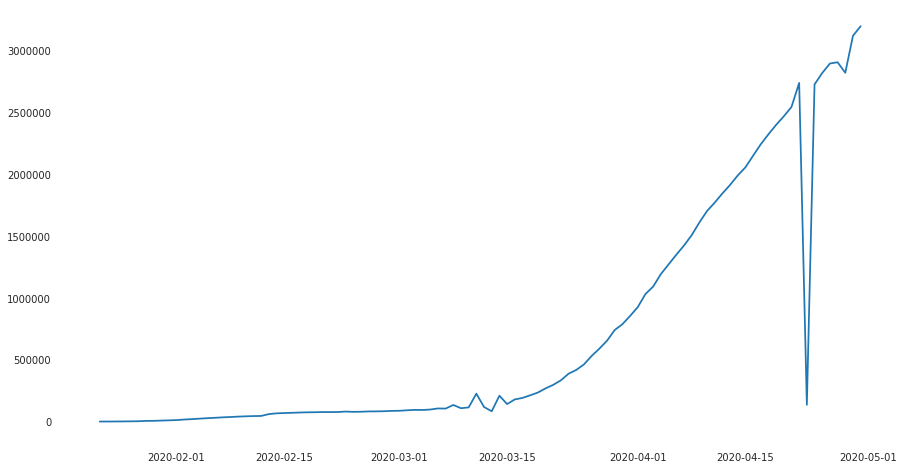

In [78]:
plt.figure(figsize=(15,8), facecolor = 'w')
plt.plot(df_confirmed.Date,df_confirmed.Total_Confirmed)
plt.xticks()
plt.show()

In [81]:
import plotly.express as px
fig = px.scatter(df_confirmed, x="Date", y="Total_Confirmed", title='COVID Confirmed Cases')
fig.show()

In [44]:
plt.figure(figsize = (15,10), facecolor = 'w')
df['Confirmed'].groupby(df['Last_Update'].dt.to_period('D')).sum()

ValueError: plot kind scatter can only be used for data frames

<Figure size 1080x720 with 0 Axes>

In [29]:
display(HTML(df.Province_State.value_counts().to_frame().to_html()))

,Province_State
Texas,7747
Georgia,6104
Virginia,5062
Kentucky,4012
Missouri,3758
Tennessee,3703
North Carolina,3680
Indiana,3557
Illinois,3475
Ohio,3329


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3039 entries, 0 to 46
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  2242 non-null   object 
 1   Country/Region  3039 non-null   object 
 2   Last Update     3039 non-null   object 
 3   Confirmed       3010 non-null   float64
 4   Deaths          2038 non-null   float64
 5   Recovered       2162 non-null   float64
 6   Suspected       88 non-null     float64
 7   ConfnSusp       341 non-null    float64
 8   Notes           4 non-null      object 
dtypes: float64(5), object(4)
memory usage: 237.4+ KB
